In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
diabetes=pd.read_csv('diabetes.csv')
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### The diabetes dataset consists of 768 data points, with 9 features each


In [5]:
print(f'Model shape of the data:{diabetes.shape}')

Model shape of the data:(768, 9)


### Outcome 0 means No diabetes, outcome 1 means diabetes

In [6]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

C:\Users\Polytech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

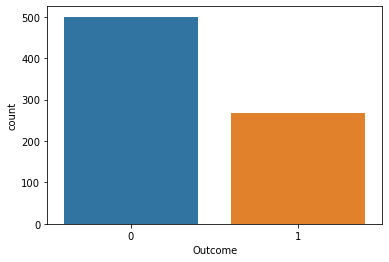

In [7]:
import seaborn as sns ##Statistical dataViz
sns.countplot(diabetes['Outcome'])

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

### Let’s investigate whether we can confirm the connection between model complexity and accuracy

In [9]:
from sklearn.model_selection import train_test_split

# target in "y"
y = diabetes['Outcome']

# feature matrix in "X" 
columns = list(diabetes.columns)
columns.remove('Outcome')
X = diabetes[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((230, 8), (538, 8), (230,), (538,))

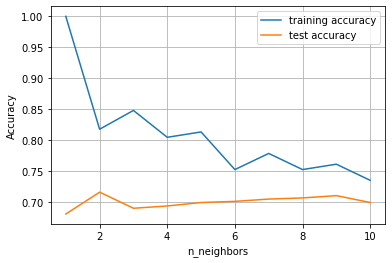

In [10]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.grid()
plt.savefig('knn_compare_model')

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 9 neighbors.

In [11]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print(f'Model accuracy of the training data:{knn.score(X_train, y_train):0.3f}')

Model accuracy of the training data:0.761


In [12]:
y_pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(f'Model accuracy of the testing data:{accuracy_score(y_pred, y_test):0.3f}')

Model accuracy of the testing data:0.710


### Logistic Regression

Logistic regression is one of the most common classification algorithms.

In [15]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression().fit(X_train,y_train)
print(f'Accuracy score of the training logreg: {logreg.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing logreg:{logreg.score(X_test,y_test):0.3f}')

Accuracy score of the training logreg: 0.757
Accuracy score of the testing logreg:0.773


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The default value of C=1 provides with 75% accuracy on training and 77% accuracy on test set.

In [14]:
logreg= LogisticRegression(C=0.01).fit(X_train,y_train)
print(f'Accuracy score of the training logreg: {logreg.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing logreg:{logreg.score(X_test,y_test):0.3f}')

Accuracy score of the training logreg: 0.774
Accuracy score of the testing logreg:0.762


The value of C=0.01 provides with 77% accuracy on training and 76% accuracy on test set <br>
it lowers the value of the testing set. Therefore, we should choose the default value C=1

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(max_depth=3,random_state=0)
# tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)
print(f'Accuracy score of the training Decis: {tree.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing Decis: {tree.score(X_test,y_test):0.3f}')

Accuracy score of the training Decis: 0.800
Accuracy score of the testing Decis: 0.727


We have to set the (max_depth=3,random_state=0) in order to avoid overfitting of the model. <br>
limiting the "depth" decreases the overfitting. This lead to lower accuracy on the training set but an
improvement on testing set
When we use the default values, The training accuracy is 100% while the testing is worse ~70% <br>
this indicates that the tree is overfitting and not generalizing well for new data

### Feature importance in Decision trees

Feature importance rates how important each feature is for the decision tree makes. it is a number between 0 and 1 <br>
for each feature where 0 means (not used at all) and 1 "perfectly predict the target"

In [16]:
print(f'feature importance decision tree:{tree.feature_importances_}')

feature importance decision tree:[0.         0.59762832 0.         0.         0.         0.2110863
 0.05126163 0.14002375]


In [17]:

diabetes_features = [x for x in (diabetes.columns)if x!='Outcome']
print(len(np.arange(8)))
print((diabetes_features))

8
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Visualize the feature importance 

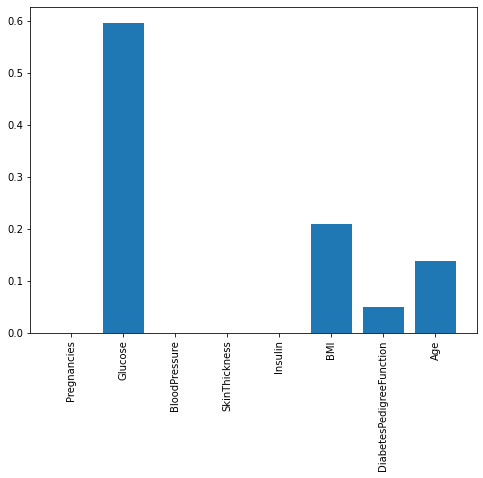

In [18]:
def plot_feature_important_diabetes(model):
    n_features=8
    plt.figure(figsize=(8,6))
    plt.bar(range(n_features),model.feature_importances_)
    plt.xticks(np.arange(n_features),diabetes_features, rotation=90)
plot_feature_important_diabetes(tree)

#### Conclusion: 
Feature Glucose is the **most** important feature

### Random Forest 

Let's apply random forest consisting on 100 tree on diabetes dataset

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)
print(f'Accuracy score of the training rf: {rf.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing rf: {rf.score(X_test,y_test):0.3f}')

Accuracy score of the training rf: 1.000
Accuracy score of the testing rf: 0.738


The randomForest gives an accuracy of 78.6% better than the logistic regression model or single decision tree. However, we can adjust the maximum depth to see whether the results can be improved 

In [22]:
rf1= RandomForestClassifier(max_depth=3,n_estimators=100,random_state=0)
rf1.fit(X_train,y_train)
print(f'Accuracy score of the training rf: {rf1.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing rf: {rf1.score(X_test,y_test):0.3f}')

Accuracy score of the training rf: 0.822
Accuracy score of the testing rf: 0.749


### Feature importance in Random Forest

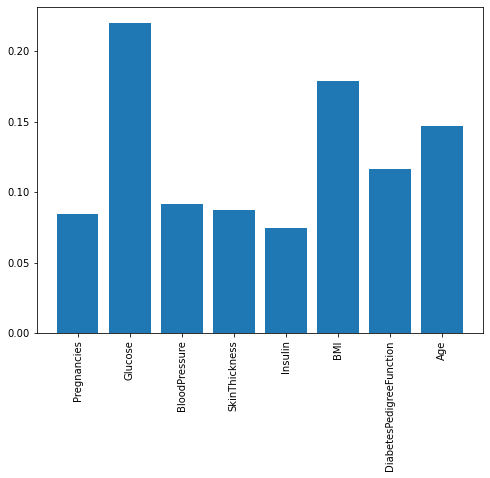

In [23]:
plot_feature_important_diabetes(rf)

The random forest gives also an importance to the "Glucose" feature. However, it considers the "BMI" as 2nd important feature. The randomness on building the random forest force the algorithm to consider many possible explanations. It captures much broader picture of the data (*his comments*)

### Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=100,random_state=0)
gb.fit(X_train,y_train)
print(f'Accuracy score of the training gb: {gb.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing gb : {gb.score(X_test,y_test):0.3f}')

Accuracy score of the training gb: 0.983
Accuracy score of the testing gb : 0.721


We are likely to be overfitting. To reduce overfitting, we could either apply **stronger pre-pruning** by **limiting the maximum depth or lower the learning rate**:

In [28]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print(f'Accuracy score of the training gb1: {gb1.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing gb1 : {gb1.score(X_test,y_test):0.3f}')

Accuracy score of the training gb: 0.835
Accuracy score of the testing gb : 0.755


In [30]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.001)
gb2.fit(X_train, y_train)
print(f'Accuracy score of the training gb2: {gb1.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing gb2 : {gb1.score(X_test,y_test):0.3f}')

Accuracy score of the training gb2: 0.835
Accuracy score of the testing gb2 : 0.755


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set. (*his comments*)

We can visualize the feature importances to get more insight into our model even though we are not really happy with the model.

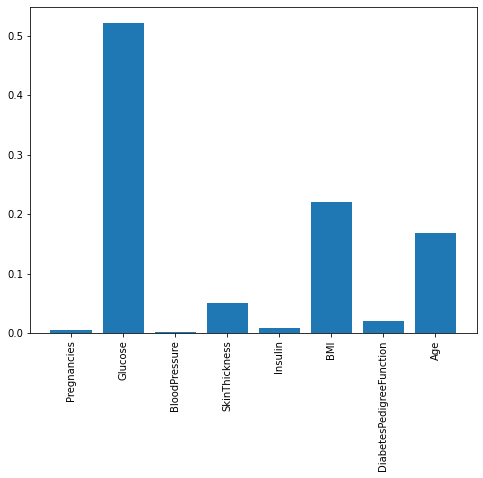

In [32]:
plot_feature_important_diabetes(gb1)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

### Support Vector Machine

In [35]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train, y_train)
print(f'Accuracy score of the training svc: {svc.score(X_train,y_train):0.3f}')
print(f'Accuracy score of the testing svc : {svc.score(X_test,y_test):0.3f}')

Accuracy score of the training svc: 0.761
Accuracy score of the testing svc : 0.749


The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set. (*his comments*)

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

svc= SVC()
svc.fit(X_train_scaled,y_train)
print(f'Accuracy score of the training svc scaled: {svc.score(X_train_scaled,y_train):0.3f}')
print(f'Accuracy score of the testing svc scaled : {svc.score(X_test_scaled,y_test):0.3f}')

Accuracy score of the training svc scaled: 0.800
Accuracy score of the testing svc scaled : 0.719


Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [1]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

In [2]:
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

In [10]:
X.shape, y.shape

((50, 10), (50,))

In [12]:
estimator = SVR(kernel="linear", C=100)
selector = RFECV(estimator, step=1, cv=5)

In [13]:
selector = selector.fit(X, y)

In [15]:
selector.support_

array([ True,  True, False,  True,  True, False, False, False, False,
       False])

In [16]:
selector.ranking_

array([1, 1, 4, 1, 1, 2, 5, 3, 6, 7])